---

# Let's practice

Before you start working and playing with the different models that we have seen, we are going to download the dataset with which you are going to work, the titanic dataset, widely known and used in machine learning courses.

For this we are going to do the following:

```python
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

titanic = fetch_openml("titanic", version=1, as_frame=True, return_X_y=False)
df_titanic = pd.DataFrame(
    data=np.c_[titanic['data'], titanic['target']],
    columns= titanic['feature_names'] + ['target']
)
df_titanic = df_titanic.rename(columns={'target': 'survived'})
```

So using the same dataset (Titanic), you should train 4 models:

* Decision Tree
* SVM
* Random Forest
* Extra: XGBoost

And you should apply the following concepts:

* Train/Test Split.
* Feature engineering.
* GridSearch or RandomSearch with CV.
* Metrics.

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC
from matplotlib import style
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [113]:
titanic = fetch_openml("titanic", version=1, as_frame=True, return_X_y=False)
df_titanic = pd.DataFrame(
    data=np.c_[titanic["data"], titanic["target"]],
    columns=titanic["feature_names"] + ["target"],
)
df_titanic = df_titanic.rename(columns={"target": "survived"})
df_titanic.head()

d:\AnyoneAI\environment\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781,151.55,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1.0,2.0,113781,151.55,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1.0,2.0,113781,151.55,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


## Exploration

**TODO:** We always have to explore our datasets, so this is not going to be the exception.

**The dataset contains the following columns:**

1. pclass: Passenger's class (1st, 2nd, or 3rd class)
2. name: Passenger's name
3. sex: Passenger's gender (male or female)
4. age: Passenger's age
5. sibsp: Number of siblings/spouses aboard
6. parch: Number of parents/children aboard
7. ticket: Ticket number
8. fare: Fare paid by the passenger
9. cabin: Cabin number where the passenger stayed
10. embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
11. boat: Lifeboat number (if survived)
12. body: Body number (if not survived and body was recovered)
13. home.dest: Home or destination of the passenger
14. survived: Survival status (1 = survived, 0 = not survived)

In [114]:
df_titanic.shape

(1309, 14)

In [115]:
# Check for missing values
print(df_titanic.isnull().sum())

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64


In [116]:
# We display basic information about the dataset
print(df_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   object
 1   name       1309 non-null   object
 2   sex        1309 non-null   object
 3   age        1046 non-null   object
 4   sibsp      1309 non-null   object
 5   parch      1309 non-null   object
 6   ticket     1309 non-null   object
 7   fare       1308 non-null   object
 8   cabin      295 non-null    object
 9   embarked   1307 non-null   object
 10  boat       486 non-null    object
 11  body       121 non-null    object
 12  home.dest  745 non-null    object
 13  survived   1309 non-null   object
dtypes: object(14)
memory usage: 143.3+ KB
None


It looks like the data types for some columns are currently listed as object instead of the appropriate data types. This could lead to issues when performing calculations and visualizations. Let's address this issue by converting the columns to their appropriate data types and then we proceed with the analysis. 

In [117]:
numeric_cols = ["pclass", "age", "sibsp", "parch", "fare", "survived"]
for col in numeric_cols:
    df_titanic[col] = pd.to_numeric(df_titanic[col], errors="coerce")

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   name       1309 non-null   object 
 2   sex        1309 non-null   object 
 3   age        1046 non-null   float64
 4   sibsp      1309 non-null   float64
 5   parch      1309 non-null   float64
 6   ticket     1309 non-null   object 
 7   fare       1308 non-null   float64
 8   cabin      295 non-null    object 
 9   embarked   1307 non-null   object 
 10  boat       486 non-null    object 
 11  body       121 non-null    object 
 12  home.dest  745 non-null    object 
 13  survived   1309 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 143.3+ KB


In [118]:
# Summary statistics
df_titanic.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


From the above summary we can conclude that, the variable 'age' has more than 200 missing values. In addition, thanks to the .info function we can observe that, in 'fare' we only have one missing value and in 'embarked' two. The variables 'cabin', 'boat', 'body' and 'home.dest' have in general more than 900 missing values. Finally, we note that the minimum age is 0.16, which would be equivalent to a child almost 2 months old. According to the [information on the victims of the catastrophe](https://titanicfacts.net/titanic-victims/) does not correspond to any data. We assume that some data were entered for educational purposes.

We created the function `count_plot_fc` to generate more explanatory tables that give us information about the relationships that may exist between the characteristics. We create countplots and barplots for the variables we are going to analyze.

In [119]:
def count_plot_fc(df, col_name, split=None, barsplit=None):
    """
    Creates countplots and barplots of the specified feature
    (with options to split the columns) and generates the
    corresponding table of counts and percentages.

    Parameters
    ----------
    df : DataFrame
        Dataset for plotting.
    col_name : string
        Name of column/feature in "data".
    countsplit : string
        Use countsplit to specify the "hue" argument of the countplot.
    barsplit: string
        Use barsplit to specify the "hue" argument of the barplot.
    """

    if (split is not None) and (barsplit is not None):
        col_count1 = df[[col_name]].groupby(by=col_name).size()
        col_perc1 = col_count1.apply(lambda x: x / sum(col_count1) * 100).round(1)
        tcount1 = pd.DataFrame({"Count": col_count1, "Percentage": col_perc1})

        col_count2 = df[[col_name, split]].groupby(by=[col_name, split]).size()
        col_perc2 = col_count2.apply(lambda x: x / sum(col_count2) * 100).round(1)
        tcount2 = pd.DataFrame({"Count": col_count2, "Percentage": col_perc2})
        display(tcount1, tcount2)

        figc, axc = plt.subplots(1, 2, figsize=(10, 4))
        sns.countplot(data=df, x=col_name, hue=None, ax=axc[0])
        sns.countplot(data=df, x=col_name, hue=split, ax=axc[1])

        figb, axb = plt.subplots(1, 2, figsize=(10, 4))
        sns.barplot(data=df, x=col_name, y="survived", hue=None, ax=axb[0])
        sns.barplot(data=df, x=col_name, y="survived", hue=barsplit, ax=axb[1])

    elif split is not None:
        col_count1 = df[[col_name]].groupby(by=col_name).size()
        col_perc1 = col_count1.apply(lambda x: x / sum(col_count1) * 100).round(1)
        tcount1 = pd.DataFrame({"Count": col_count1, "Percentage": col_perc1})

        col_count2 = df[[col_name, split]].groupby(by=[col_name, split]).size()
        col_perc2 = col_count2.apply(lambda x: x / sum(col_count2) * 100).round(1)
        tcount2 = pd.DataFrame({"Count": col_count2, "Percentage": col_perc2})
        display(tcount1, tcount2)

        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        sns.countplot(data=df, x=col_name, hue=None, ax=axes[0])
        sns.countplot(data=df, x=col_name, hue=split, ax=axes[1])

    else:
        col_count = df[[col_name]].groupby(by=col_name).size()
        col_perc = col_count.apply(lambda x: x / sum(col_count) * 100).round(1)
        tcount1 = pd.DataFrame({"Count": col_count, "Percentage": col_perc})
        display(tcount1)

        sns.countplot(data=df, x=col_name)

,Count,Percentage
survived,,
0,809,61.8
1,500,38.2


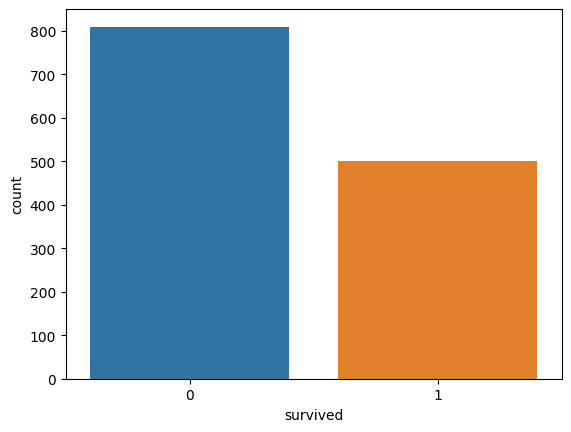

In [120]:
count_plot_fc(df=df_titanic, col_name="survived")

As we can see, only about 40% of the passengers survived. We can assume that, for the most part, they should belong to the first class passengers. That is why, we will see more in detail this characteristic regarding the passengers who did survive.

,Count,Percentage
pclass,,
1.0,323,24.7
2.0,277,21.2
3.0,709,54.2


Count  Percentage
pclass survived                   
1.0    0           123         9.4
       1           200        15.3
2.0    0           158        12.1
       1           119         9.1
3.0    0           528        40.3
       1           181        13.8

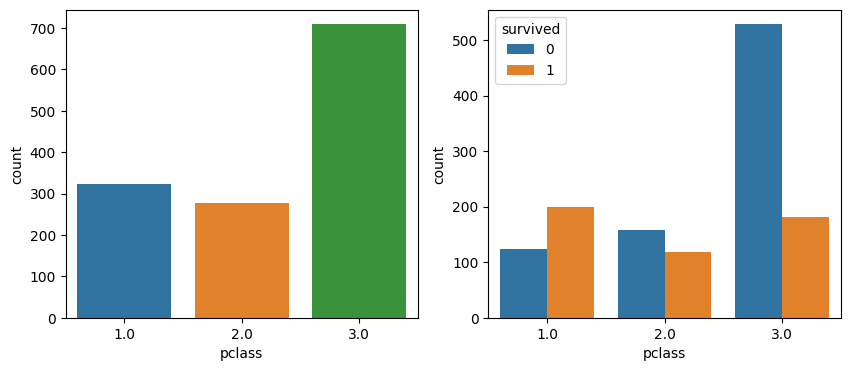

In [121]:
count_plot_fc(df=df_titanic, col_name="pclass", split="survived")

As expected, the percentage of survivors is higher for first class passengers. There is not much difference with second class passengers, which is understandable if we consider that the Titanic was a luxury liner.

,Count,Percentage
sex,,
female,466,35.6
male,843,64.4


Count  Percentage
sex    survived                   
female 0           127         9.7
       1           339        25.9
male   0           682        52.1
       1           161        12.3

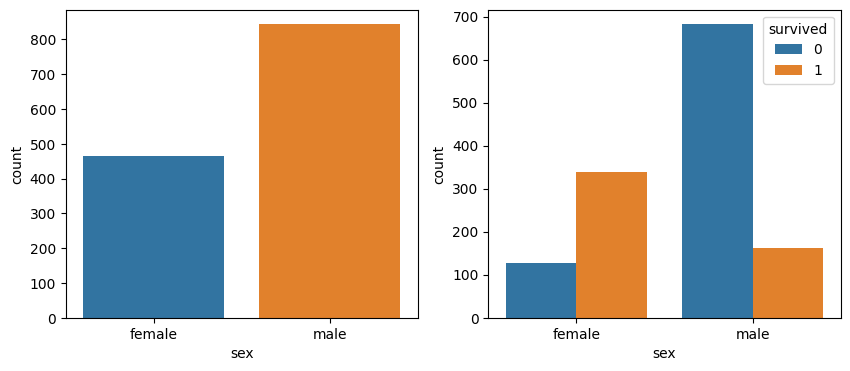

In [122]:
count_plot_fc(df=df_titanic, col_name="sex", split="survived")

Although about 65% of the passengers were male, we can observe that the rate of survivors is lower than in the case of females, at about 26%. We can establish here a new relationship: female passengers are more likely to survive than male passengers. 

,Count,Percentage
sex,,
female,466,35.6
male,843,64.4


Count  Percentage
sex    pclass                   
female 1.0       144        11.0
       2.0       106         8.1
       3.0       216        16.5
male   1.0       179        13.7
       2.0       171        13.1
       3.0       493        37.7

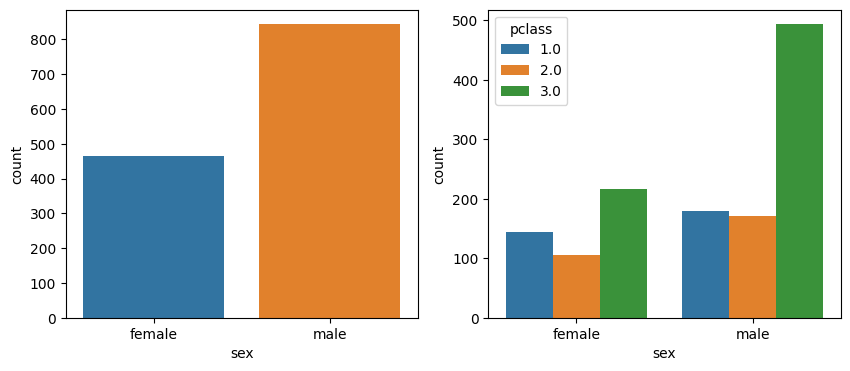

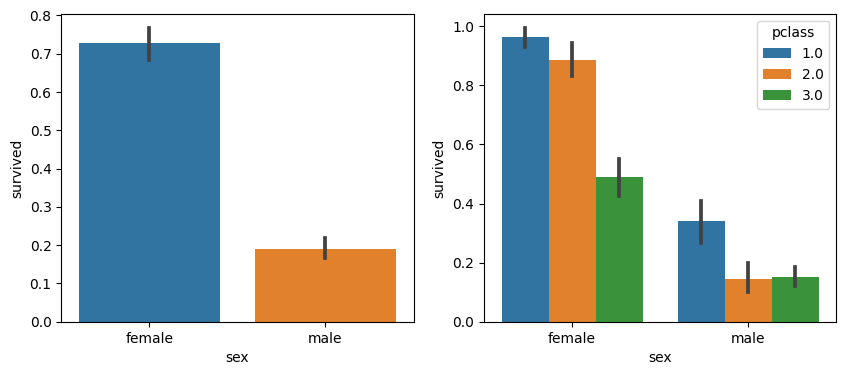

In [123]:
count_plot_fc(df=df_titanic, col_name="sex", split="pclass", barsplit="pclass")

The above barplot gives us more detailed information on the matter: first and second class female passengers were nearly twice as likely to survive as third class female passengers. At the same time, women had a much better chance of survival than men of any class (who had the least chance of survival).

,Count,Percentage
embarked,,
C,270,20.7
Q,123,9.4
S,914,69.9


Count  Percentage
embarked survived                   
C        0           120         9.2
         1           150        11.5
Q        0            79         6.0
         1            44         3.4
S        0           610        46.7
         1           304        23.3

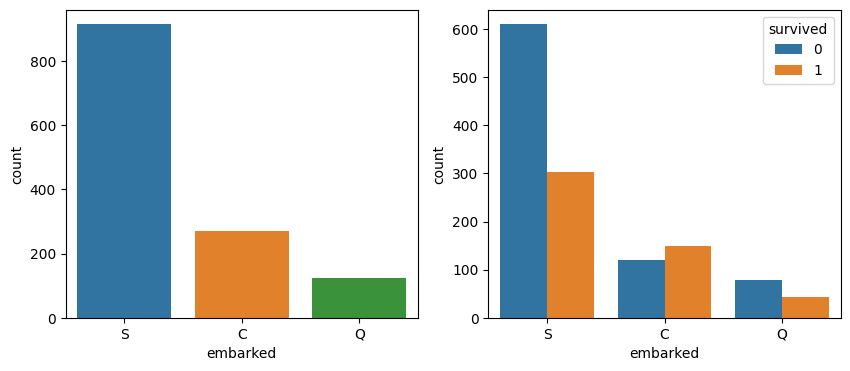

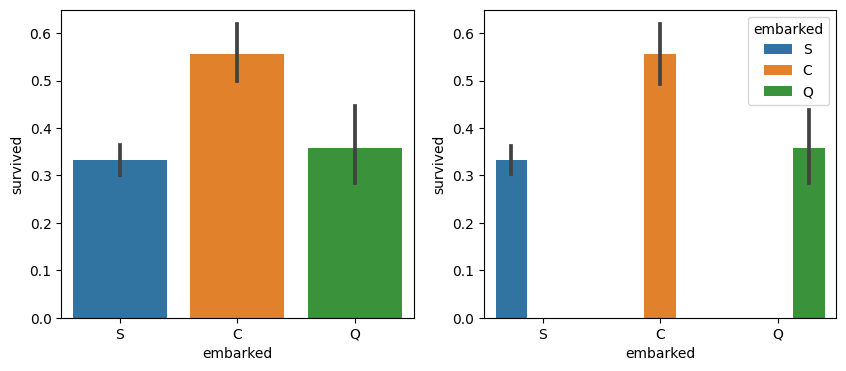

In [124]:
count_plot_fc(df=df_titanic, col_name="embarked", split="survived", barsplit="embarked")

From the left countplot (and table), almost 70% of passengers embarked from S(outhampton), 20% from C(herbourg) and 9% from Q(ueenstown). However, the survival rate was highest at around 55% for Cherbourg, around 40% for Queenstown and 34% for Southampton. We can go further by splitting the Embarked countplots and barplots on other features such as sex and pclass. 

First, we see how many males and females are from each port and their survival rates:

,Count,Percentage
embarked,,
C,270,20.7
Q,123,9.4
S,914,69.9


Count  Percentage
embarked sex                      
C        female    113         8.6
         male      157        12.0
Q        female     60         4.6
         male       63         4.8
S        female    291        22.3
         male      623        47.7

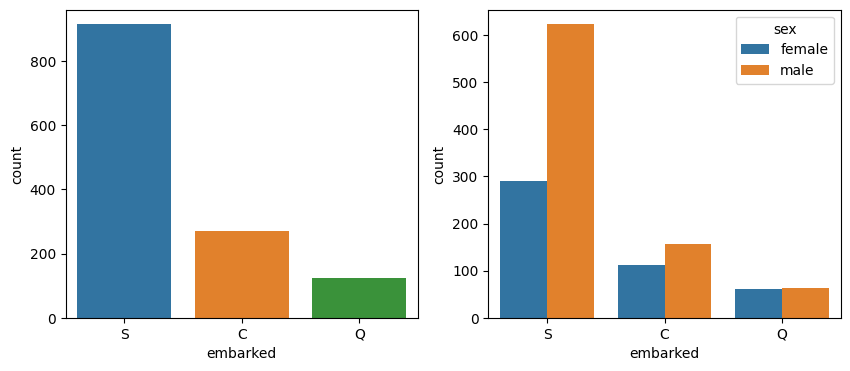

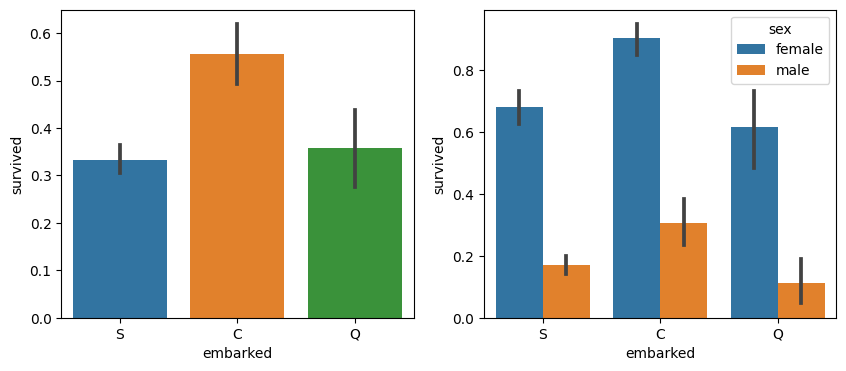

In [125]:
count_plot_fc(df=df_titanic, col_name="embarked", split="sex", barsplit="sex")

The count graph obtained (1, 2) has a shape similar to the one obtained in the previous step when we counted the surviving people. In both cases, the proportion between male and female passengers is similar for the cases of Cherbourg and Queenstown, but in the case of Southampton it is observed that the proportion is almost double. The number of men is more than double that of women in Southampton, which explains why the overall survival rate in Southampton is lower, around 34% (we see this graphically in (2,1)).

In the survival graph (2, 2) we see that the survival rates for female passengers are around 70% and 60%, for Southampton and Queenstown, respectively. However, the rate is much higher in the case of Cherbourg, which is around approximately 85%. For males, unexpected survival rates are around 35% for Cherbourg and around 10% for Queenstown and around 20% for Southampton. Perhaps these anomalies can be explained by looking at the column splits based on pclass:

,Count,Percentage
embarked,,
C,270,20.7
Q,123,9.4
S,914,69.9


Count  Percentage
embarked pclass                   
C        1.0       141        10.8
         2.0        28         2.1
         3.0       101         7.7
Q        1.0         3         0.2
         2.0         7         0.5
         3.0       113         8.6
S        1.0       177        13.5
         2.0       242        18.5
         3.0       495        37.9

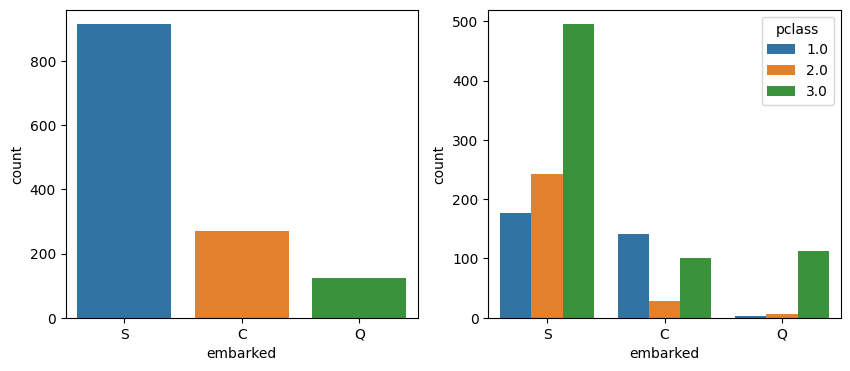

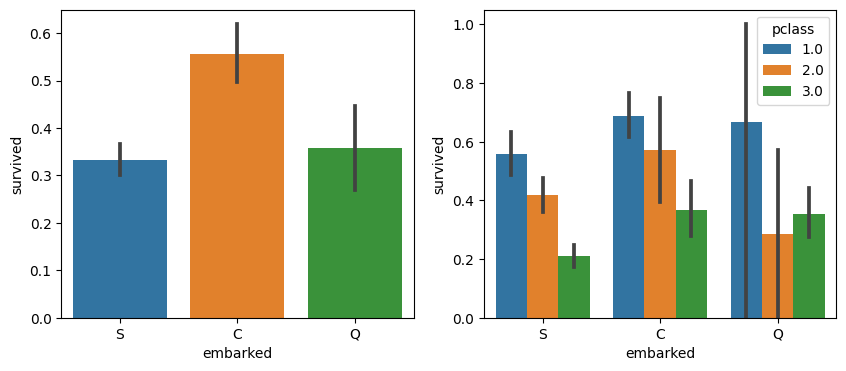

In [126]:
count_plot_fc(df=df_titanic, col_name="embarked", split="pclass", barsplit="pclass")

We can conclude from the information provided by the graphs that, as we imagined above, the highest survival rates for passengers of both sexes were mostly for first class passengers. Where the survival rates are around 70% for people embarked in Cherbourg and Queenstown, being a little lower for the case of Southampton with around 60%.

Up to this point we have analyzed the information provided by the variables 'embarked', 'sex', 'pclass' and 'survived'. Let's now analyze what happens with numerical variables and if they can help us shed some more light on our analysis.

The column SibSp specifies the number of siblings/spouses on board the Titanic that are related to the passenger. Does having siblings/spouses on the trip influence the survival of the passenger? We find out by investigating this column:

,Count,Percentage
sibsp,,
0.0,891,68.1
1.0,319,24.4
2.0,42,3.2
3.0,20,1.5
4.0,22,1.7
5.0,6,0.5
8.0,9,0.7


Count  Percentage
sibsp survived                   
0.0   0           582        44.5
      1           309        23.6
1.0   0           156        11.9
      1           163        12.5
2.0   0            23         1.8
      1            19         1.5
3.0   0            14         1.1
      1             6         0.5
4.0   0            19         1.5
      1             3         0.2
5.0   0             6         0.5
8.0   0             9         0.7

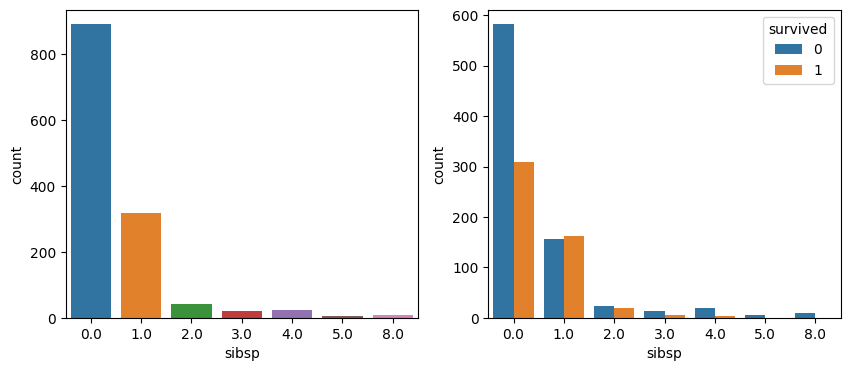

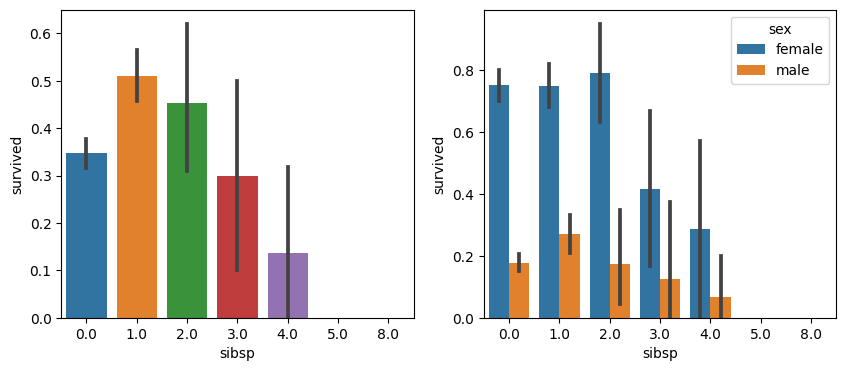

In [127]:
count_plot_fc(df=df_titanic, col_name="sibsp", split="survived", barsplit="sex")

The first graph tells us that almost 68% of the passengers did not have siblings/spouses with them, and the rest had one or more. The second graph counts the number of passengers who survived. Passengers who had one or two siblings/spouse had a higher survival rate (about 50%) than those without siblings/spouse (about 35%). The last chart is the most interesting, since we can make some guesses based on the gender of the passenger and whether or not he had a spouse.

In the last graph, we know that the expectation of female survival rates of around 70% and male survival rates of 30%, we can see that categories 0, 1 and 2 of 'sibsp' roughly align with this benchmark. The sample size for 3 or more 'sibsp' is too small, so these categories need not meet expectations.

,Count,Percentage
parch,,
0.0,1002,76.5
1.0,170,13.0
2.0,113,8.6
3.0,8,0.6
4.0,6,0.5
5.0,6,0.5
6.0,2,0.2
9.0,2,0.2


Count  Percentage
parch survived                   
0.0   0           666        50.9
      1           336        25.7
1.0   0            70         5.3
      1           100         7.6
2.0   0            56         4.3
      1            57         4.4
3.0   0             3         0.2
      1             5         0.4
4.0   0             5         0.4
      1             1         0.1
5.0   0             5         0.4
      1             1         0.1
6.0   0             2         0.2
9.0   0             2         0.2

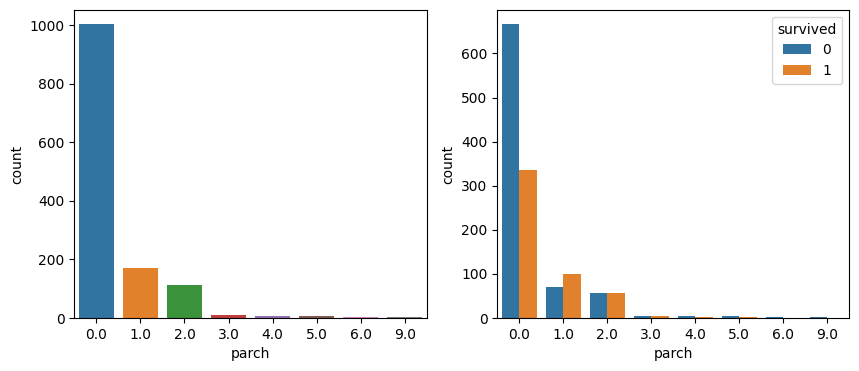

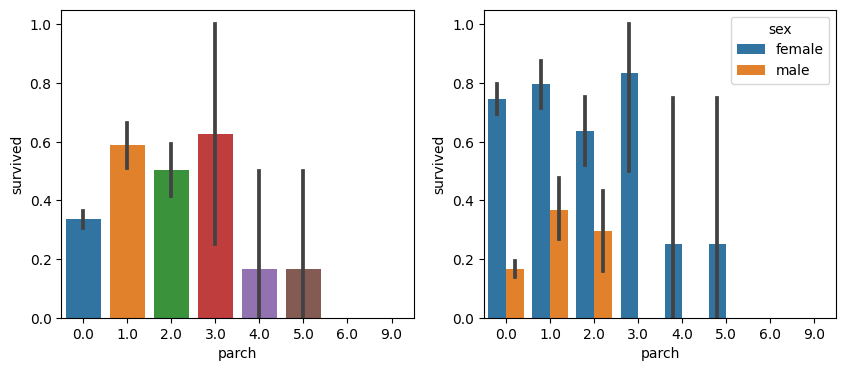

In [128]:
count_plot_fc(df=df_titanic, col_name="parch", split="survived", barsplit="sex")

Again, similar to the 'sibsp' column, passengers with no parents/children were less likely to survive (around 35% as seen from the third plot (2,1)) than those with one, two or three parents/children (around 60%). From the last plot (2,2), males with one or two parents/children also had a higher survival rate (between 35% and 40%) compared to those with no parents/children.

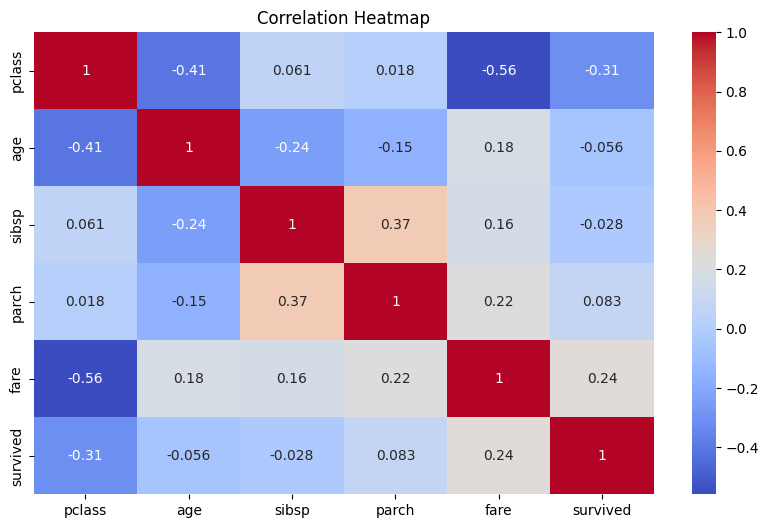

In [129]:
# We create a correlation heatmap (excluding non-numeric columns):
numeric_df = df_titanic[numeric_cols]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Feature Engineering

**TODO:** 
    
* Fill in the missing values using any criteria that you consider appropriate.
* Eliminate those features that you consider necessary.
* Format categorical features, using Label and/or Hot encoder.

In [130]:
# We create a copy of the original dataset
df = df_titanic.copy()

In [131]:
# We fill missing values for 'age', 'fare' and 'embarked' colummns then, we drop what we consider unnecessary columns:
median_age = df["age"].median()
df["age"].fillna(median_age, inplace=True)

median_fare = df["fare"].median()
df["fare"].fillna(median_fare, inplace=True)

mode_embarked = df["embarked"].mode()[0]
df["embarked"].fillna(mode_embarked, inplace=True)

df["cabin"].fillna("Unknown", inplace=True)

columns_to_drop = ["boat", "body", "home.dest"]
df.drop(columns=columns_to_drop, inplace=True)

In [132]:
columns_to_drop = ["name", "ticket", "cabin"]
df.drop(columns=columns_to_drop, inplace=True)

In [133]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# First, we encode the categorical columns:
df["sex"] = label_encoder.fit_transform(df["sex"])
df["embarked"] = label_encoder.fit_transform(df["embarked"])
df["pclass"] = label_encoder.fit_transform(df["pclass"])

# Then, we create dummy variables for the categorical column 'embarked':
df = pd.get_dummies(df, columns=["embarked", "pclass"], drop_first=True)
df.rename(columns={"embarked_1": "port_Q", "embarked_2": "port_S"}, inplace=True)

In [134]:
df.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'survived', 'port_Q', 'port_S',
       'pclass_1', 'pclass_2'],
      dtype='object')

## Hyperparameter Optimization

**TODO:**

* Split the dataset into 80% train and 20% test.
* Using GridSearchCV or RandomSearchCV, tests different hyperparameter values for each model and chooses the best model from each of them.
* Evaluate the metrics of each model (accuracy, precision, recall, f1-score, roc-auc score) and choose the one with the best performance.
* Plot the precision and recall curves (tip: there is a sklearn method for this)
* Plot the ROC curve (tip: there is a sklearn method for it)

In [135]:
# We import the necessary libraries:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

In [136]:
# We split the dataset into features and target:
X = df.drop(columns=["survived"])
y = df["survived"]

# Step 1: we split the dataset:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [137]:
# Step 2: we define the models:


# We define the hyperparameter tuning with grid search and random search cross-validation:
def gridtune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model


def randtune_model(model, param_grid, X_train, y_train):
    random_search = RandomizedSearchCV(model, param_grid, cv=5, scoring="accuracy")
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    return best_model


# We define hyperparameter grids for each model:
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

param_grid_lr = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
    "max_iter": [100, 200, 300],
}

param_grid_gb = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "min_samples_split": [2, 3, 4],
}

# Tunning models:
best_rf_model = gridtune_model(
    RandomForestClassifier(), param_grid_rf, X_train, y_train
)
best_lr_model = randtune_model(LogisticRegression(), param_grid_lr, X_train, y_train)
best_gb_model = randtune_model(
    GradientBoostingClassifier(), param_grid_gb, X_train, y_train
)

d:\AnyoneAI\environment\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\AnyoneAI\environment\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\AnyoneAI\environment\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\AnyoneAI\environment\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\AnyoneAI\environment\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\AnyoneAI\environment\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

## Metrics

**TODO:**

* Evaluate the metrics of each model (accuracy, precision, recall, f1-score, roc-auc score) and choose the one with the best performance.
* Plot the precision and recall curves (tip: there is a sklearn method for this)
* Plot the ROC curve (tip: there is a sklearn method for it)

In [138]:
# Step 3: we evaluate the models:


# We evaluate metrics for the best models:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    return accuracy, precision, recall, f1, roc_auc


accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf = evaluate_model(
    best_rf_model, X_test, y_test
)
accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr = evaluate_model(
    best_lr_model, X_test, y_test
)
accuracy_gb, precision_gb, recall_gb, f1_gb, roc_auc_gb = evaluate_model(
    best_gb_model, X_test, y_test
)

In [139]:
# Print the performance metrics for each model
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")
print("")

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print(f"ROC-AUC Score: {roc_auc_lr:.4f}")
print("")

print("Gradient Boosting Metrics:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")
print(f"ROC-AUC Score: {roc_auc_gb:.4f}")

Random Forest Metrics:
Accuracy: 0.7672
Precision: 0.8353
Recall: 0.6017
F1 Score: 0.6995
ROC-AUC Score: 0.8652

Logistic Regression Metrics:
Accuracy: 0.7748
Precision: 0.8172
Recall: 0.6441
F1 Score: 0.7204
ROC-AUC Score: 0.8571

Gradient Boosting Metrics:
Accuracy: 0.7519
Precision: 0.8841
Recall: 0.5169
F1 Score: 0.6524
ROC-AUC Score: 0.8507


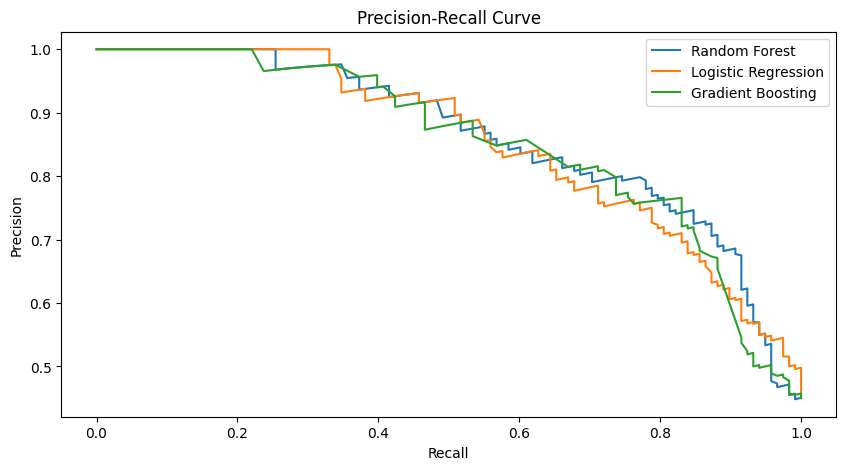

In [140]:
# Step 4: we compare the results:

# We plot precision-recall curves for the best models:
plt.figure(figsize=(10, 5))
precision, recall, _ = precision_recall_curve(
    y_test, best_rf_model.predict_proba(X_test)[:, 1]
)
plt.plot(recall, precision, label="Random Forest")

precision, recall, _ = precision_recall_curve(
    y_test, best_lr_model.predict_proba(X_test)[:, 1]
)
plt.plot(recall, precision, label="Logistic Regression")

precision, recall, _ = precision_recall_curve(
    y_test, best_gb_model.predict_proba(X_test)[:, 1]
)
plt.plot(recall, precision, label="Gradient Boosting")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

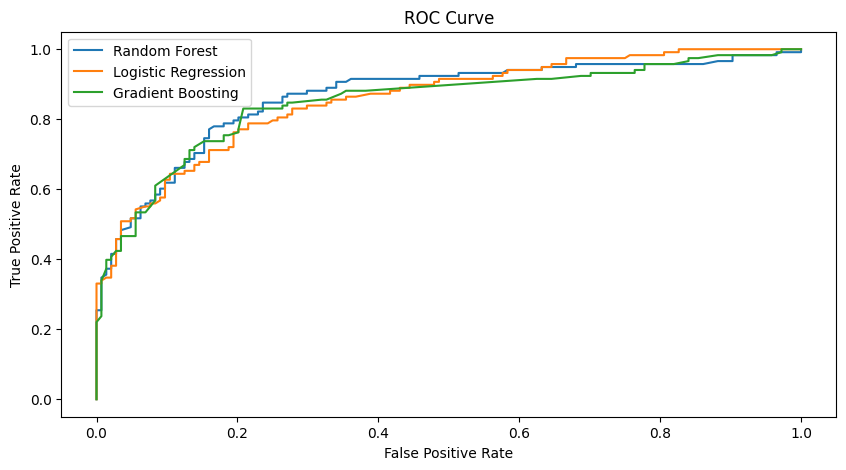

In [141]:
# Step 5: we compare the results:

# We plot ROC curves for the best models:
plt.figure(figsize=(10, 5))
fpr, tpr, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="Random Forest")

fpr, tpr, _ = roc_curve(y_test, best_lr_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="Logistic Regression")

fpr, tpr, _ = roc_curve(y_test, best_gb_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="Gradient Boosting")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

---

# Pipeline with ColumnTransformer and GridSearchCV

Only toy datasets like the __iris dataset__ will contain only numeric data, as we saw in the previous exercise, the __titanic dataset__ had a variety of different data types and not just numeric data.

By having different types of data we will not be able to apply the same transformations to each of them, instead we will have to apply different transformations depending on the type of data.

Next we are going to see an example of how to use __ColumnTransformer__ to simplify the application of these different transformations and above all to be able to insert it into a __Pipeline__.

Let’s use the toy dataset, which contains both numerical and categorical data, and apply:

* Normalize the Income column with MinMaxScaler()
* Encode Categorical Columns with OneHotEncoder()
* Group the Age column with binning.

In [142]:
titanic = fetch_openml("titanic", version=1, as_frame=True, return_X_y=False)
df_titanic = pd.DataFrame(
    data=np.c_[titanic["data"], titanic["target"]],
    columns=titanic["feature_names"] + ["target"],
)
df_titanic = df_titanic.rename(columns={"target": "survived"})
df_titanic = df_titanic[["sex", "cabin", "age", "fare", "survived"]]

df_titanic["age"] = df_titanic["age"].astype("float64")
df_titanic["fare"] = df_titanic["fare"].astype("float64")

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1309 non-null   object 
 1   cabin     295 non-null    object 
 2   age       1046 non-null   float64
 3   fare      1308 non-null   float64
 4   survived  1309 non-null   object 
dtypes: float64(2), object(3)
memory usage: 51.3+ KB


d:\AnyoneAI\environment\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [143]:
df_titanic.isna().sum()

sex            0
cabin       1014
age          263
fare           1
survived       0
dtype: int64

In [144]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Numeric features
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Categorical features
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, ["age", "fare"]),
        ("cat", categorical_transformer, ["sex", "cabin"]),
    ]
)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(
    df_titanic.drop("survived", axis=1),
    df_titanic.survived,
    test_size=0.2,
    random_state=0,
)

In [146]:
my_pipe = Pipeline(
    [("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())]
)

my_params = {"classifier__max_depth": [2, 3, 4, 5, 6, 7, 8]}

grid = GridSearchCV(my_pipe, my_params, cv=5)
grid.fit(X_train, y_train)
score = grid.score(X_test, y_test)

print(f"Test score: {score}")
print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Test score: 0.7977099236641222
Best parameters: {'classifier__max_depth': 5}
Best score: 0.7927044884939622


**TODO:**

Using __ColumnTransformer__ and __Pipeline__, build a pipeline where different transformations are applied to different types of data, you can use the Titanic dataset again. Also, do some research about the [FutureUnion](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html) method.